<a href="https://colab.research.google.com/github/hnur79997-stack/UTS-PCD/blob/main/pcd_no2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

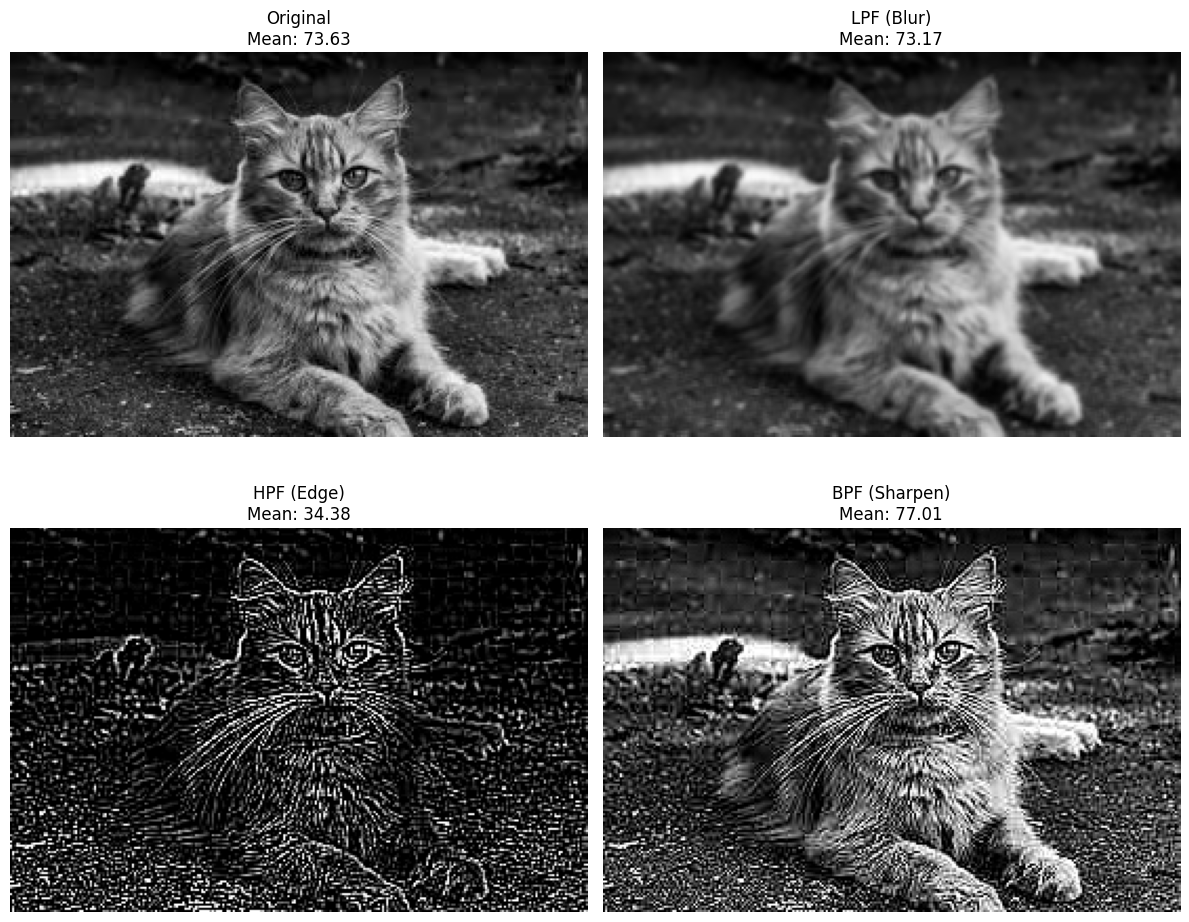

Rata-rata nilai piksel (mean):
 Original : 73.6287
 LPF      : 73.1711
 HPF      : 34.3827
 BPF      : 77.0083

File analisa_filter.txt disimpan di folder kerja saat ini.


In [3]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ----------------- Konfigurasi -----------------
filename = "kucing.jpg"   # ganti dengan nama file citra grayscale kamu
# Jika file tidak ada, script akan membuat citra contoh (gradien + noise)
# ------------------------------------------------

# 1) Baca citra grayscale atau buat contoh jika tidak ada
if os.path.exists(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Gagal membaca citra. Pastikan file adalah gambar dan path benar.")
else:
    # contoh: gradien + noise agar efek terlihat
    x = np.linspace(0, 255, 512, dtype=np.uint8)
    img = np.tile(x, (512,1))
    noise = np.random.randint(0, 40, img.shape, dtype=np.uint8)
    img = cv2.add(img, noise)

# pastikan tipe float untuk konvolusi
img_f = img.astype(np.float32)

# 2) Definisi kernel sesuai soal
kernel_LPF = (1/9) * np.array([[1,1,1],
                               [1,1,1],
                               [1,1,1]], dtype=np.float32)

kernel_HPF = np.array([[-1,-1,-1],
                       [-1, 8,-1],
                       [-1,-1,-1]], dtype=np.float32)

kernel_BPF = np.array([[0,-1,0],
                       [-1, 5,-1],
                       [0,-1,0]], dtype=np.float32)

# 3) Terapkan konvolusi (cv2.filter2D) — preserve depth dengan ddepth=-1
lpf = cv2.filter2D(img_f, ddepth=-1, kernel=kernel_LPF)
hpf = cv2.filter2D(img_f, ddepth=-1, kernel=kernel_HPF)
bpf = cv2.filter2D(img_f, ddepth=-1, kernel=kernel_BPF)

# 4) Clip & konversi ke uint8 untuk tampilan
def to_uint8(x):
    return np.clip(x, 0, 255).astype(np.uint8)

lpf_u8 = to_uint8(lpf)
hpf_u8 = to_uint8(hpf)
bpf_u8 = to_uint8(bpf)

# 5) Hitung rata-rata piksel
mean_orig = float(np.mean(img))
mean_lpf  = float(np.mean(lpf_u8))
mean_hpf  = float(np.mean(hpf_u8))
mean_bpf  = float(np.mean(bpf_u8))

# 6) Tampilkan 4 gambar dalam satu figure
plt.figure(figsize=(12,10))

plt.subplot(2,2,1); plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Original\nMean: {mean_orig:.2f}'); plt.axis('off')

plt.subplot(2,2,2); plt.imshow(lpf_u8, cmap='gray', vmin=0, vmax=255)
plt.title(f'LPF (Blur)\nMean: {mean_lpf:.2f}'); plt.axis('off')

plt.subplot(2,2,3); plt.imshow(hpf_u8, cmap='gray', vmin=0, vmax=255)
plt.title(f'HPF (Edge)\nMean: {mean_hpf:.2f}'); plt.axis('off')

plt.subplot(2,2,4); plt.imshow(bpf_u8, cmap='gray', vmin=0, vmax=255)
plt.title(f'BPF (Sharpen)\nMean: {mean_bpf:.2f}'); plt.axis('off')

plt.tight_layout()
plt.show()

# 7) Cetak ringkasan nilai rata-rata
print("Rata-rata nilai piksel (mean):")
print(f" Original : {mean_orig:.4f}")
print(f" LPF      : {mean_lpf:.4f}")
print(f" HPF      : {mean_hpf:.4f}")
print(f" BPF      : {mean_bpf:.4f}")

# 8) Simpan analisa singkat ke file txt
analysis_text = f"""Analisa Soal No.2 - Konvolusi 3 Kernel
---------------------------------------
File input : {filename if os.path.exists(filename) else 'contoh_gradien_tidak_ada_file'}
Rata-rata nilai piksel (mean):
 - Original : {mean_orig:.4f}
 - LPF      : {mean_lpf:.4f}
 - HPF      : {mean_hpf:.4f}
 - BPF      : {mean_bpf:.4f}

Perbandingan Visual & Penjelasan Singkat:
 - LPF (Low Pass Filter): menghasilkan citra yang lebih halus (blur). Frekuensi tinggi (tepi, noise) diredam.
 - HPF (High Pass Filter): menonjolkan tepi dan detail frekuensi tinggi; area datar/halus menjadi gelap atau tereduksi.
 - BPF (Kernel sharpening): memperkuat tepi sambil menjaga tampilan relatif natural (penajaman).

Hubungan Domain Spasial vs Domain Frekuensi:
 - Konvolusi di domain spasial (aplikasi kernel ke piksel) ekuivalen dengan perkalian spektrum di domain frekuensi (Fourier).
 - LPF => melewatkan komponen frekuensi rendah (smooth); di frekuensi ini respon filter mendekati 1 pada frekuensi rendah.
 - HPF => melewatkan komponen frekuensi tinggi (edge/detail); di frekuensi tinggi respon filter besar.
 - BPF (sharpen) => memberikan gain pada rentang frekuensi menengah/tinggi untuk menajamkan citra.
"""

with open("analisa_filter.txt", "w") as f:
    f.write(analysis_text)

print("\nFile analisa_filter.txt disimpan di folder kerja saat ini.")
